In [1]:
import logging
import mxnet as mx
from mxnet import gluon
from mxnet.gluon import nn
from mxnet import autograd as ag
mx.random.seed(123)

In [2]:
BATCH_SIZE = 128
NUM_CLASSES = 10
EPOCHS = 12
ctx = [mx.gpu() if mx.test_utils.list_gpus() else mx.cpu()]

In [3]:
# dataset
mnist = mx.test_utils.get_mnist()
train_data = mx.io.NDArrayIter(mnist['train_data'], mnist['train_label'], BATCH_SIZE, shuffle=True)
val_data = mx.io.NDArrayIter(mnist['test_data'], mnist['test_label'], BATCH_SIZE)

## [Module API](https://mxnet.incubator.apache.org/tutorials/basic/module.html)

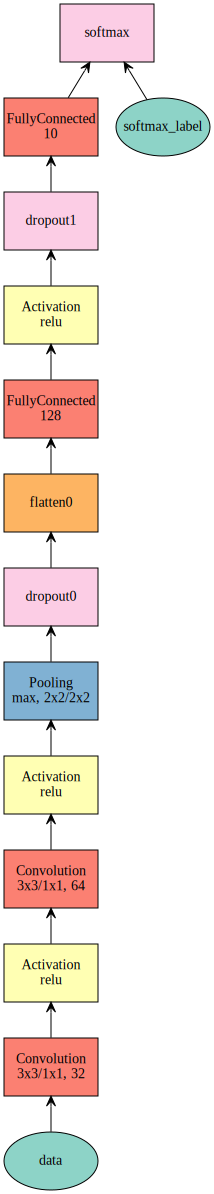

In [4]:
# define network
data = mx.sym.Variable('data')
out = mx.sym.Convolution(data, kernel=(3, 3), stride=(1, 1), num_filter=32, name='conv1')
out = mx.sym.Activation(out, act_type='relu')
out = mx.sym.Convolution(out, kernel=(3, 3), stride=(1, 1), num_filter=64, name='conv2')
out = mx.sym.Activation(out, act_type='relu')
out = mx.sym.Pooling(out, pool_type='max', kernel=(2, 2), stride=(2, 2), name='pool1')
out = mx.sym.Dropout(out, p=0.25)
out = mx.sym.Flatten(out)
out = mx.sym.FullyConnected(out, num_hidden=128, name='fc1')
out = mx.sym.Activation(out, act_type='relu')
out = mx.sym.Dropout(out, p=0.5)
out = mx.sym.FullyConnected(out, num_hidden=NUM_CLASSES, name='fc2')
net = mx.sym.SoftmaxOutput(out, name='softmax')
mx.viz.plot_network(net)

In [5]:
# create a module
mod = mx.mod.Module(symbol=net, context=ctx)

In [6]:
%%time
logging.getLogger().setLevel(logging.INFO)
train_data.reset()
# fit the module
mod.fit(
    train_data,
    eval_data=val_data,
    optimizer='adam',
    optimizer_params={'learning_rate': 0.001},
    eval_metric='acc',
    num_epoch=EPOCHS)

INFO:root:Epoch[0] Train-accuracy=0.817314
INFO:root:Epoch[0] Time cost=155.095
INFO:root:Epoch[0] Validation-accuracy=0.955696
INFO:root:Epoch[1] Train-accuracy=0.930887
INFO:root:Epoch[1] Time cost=192.204
INFO:root:Epoch[1] Validation-accuracy=0.973002
INFO:root:Epoch[2] Train-accuracy=0.946962
INFO:root:Epoch[2] Time cost=166.888
INFO:root:Epoch[2] Validation-accuracy=0.977551
INFO:root:Epoch[3] Train-accuracy=0.954508
INFO:root:Epoch[3] Time cost=181.041
INFO:root:Epoch[3] Validation-accuracy=0.982002
INFO:root:Epoch[4] Train-accuracy=0.959688
INFO:root:Epoch[4] Time cost=179.408
INFO:root:Epoch[4] Validation-accuracy=0.983881
INFO:root:Epoch[5] Train-accuracy=0.966168
INFO:root:Epoch[5] Time cost=181.198
INFO:root:Epoch[5] Validation-accuracy=0.984375
INFO:root:Epoch[6] Train-accuracy=0.969866
INFO:root:Epoch[6] Time cost=173.408
INFO:root:Epoch[6] Validation-accuracy=0.987045
INFO:root:Epoch[7] Train-accuracy=0.971832
INFO:root:Epoch[7] Time cost=174.716
INFO:root:Epoch[7] Valid

CPU times: user 36min 20s, sys: 2.75 s, total: 36min 22s
Wall time: 36min 14s


## [Gluon](https://mxnet.incubator.apache.org/gluon/index.html)

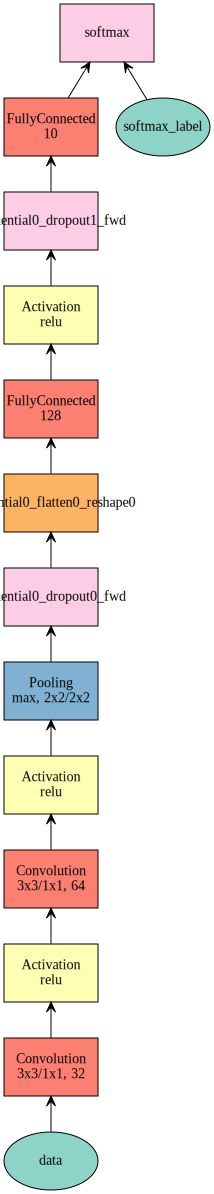

In [7]:
# define network
net = nn.Sequential()
with net.name_scope():
    net.add(nn.Conv2D(32, kernel_size=(3, 3), activation='relu'))
    net.add(nn.Conv2D(64, kernel_size=(3, 3), activation='relu'))
    net.add(nn.MaxPool2D(pool_size=(2, 2)))
    net.add(nn.Dropout(0.25))
    net.add(nn.Flatten())
    net.add(nn.Dense(128, activation='relu'))
    net.add(nn.Dropout(0.5))
    net.add(nn.Dense(NUM_CLASSES))
net.initialize(ctx=ctx)
# to symbol
net = mx.sym.SoftmaxOutput(net(mx.sym.var('data')), name='softmax')
mx.viz.plot_network(net)

In [8]:
# create a module
mod = mx.mod.Module(symbol=net, context=ctx)

In [9]:
%%time
train_data.reset()
# fit the module
mod.fit(
    train_data,
    eval_data=val_data,
    optimizer='adam',
    optimizer_params={'learning_rate': 0.001},
    eval_metric='acc',
    num_epoch=EPOCHS)

INFO:root:Epoch[0] Train-accuracy=0.840502
INFO:root:Epoch[0] Time cost=130.385
INFO:root:Epoch[0] Validation-accuracy=0.954015
INFO:root:Epoch[1] Train-accuracy=0.932753
INFO:root:Epoch[1] Time cost=149.461
INFO:root:Epoch[1] Validation-accuracy=0.968256
INFO:root:Epoch[2] Train-accuracy=0.948411
INFO:root:Epoch[2] Time cost=148.986
INFO:root:Epoch[2] Validation-accuracy=0.976661
INFO:root:Epoch[3] Train-accuracy=0.958522
INFO:root:Epoch[3] Time cost=148.726
INFO:root:Epoch[3] Validation-accuracy=0.980518
INFO:root:Epoch[4] Train-accuracy=0.965885
INFO:root:Epoch[4] Time cost=154.458
INFO:root:Epoch[4] Validation-accuracy=0.984771
INFO:root:Epoch[5] Train-accuracy=0.970382
INFO:root:Epoch[5] Time cost=166.848
INFO:root:Epoch[5] Validation-accuracy=0.985562
INFO:root:Epoch[6] Train-accuracy=0.973664
INFO:root:Epoch[6] Time cost=162.041
INFO:root:Epoch[6] Validation-accuracy=0.986946
INFO:root:Epoch[7] Train-accuracy=0.976779
INFO:root:Epoch[7] Time cost=166.050
INFO:root:Epoch[7] Valid

CPU times: user 32min 6s, sys: 1.53 s, total: 32min 8s
Wall time: 32min
